<a href="https://colab.research.google.com/github/alonsoelbio/data_science_pratica/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [13]:
# importar os pacotes necessarios
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/spain/catalonia/barcelona/2024-12-12/visualisations/listings.csv")
df_clean = pd.read_csv("https://data.insideairbnb.com/spain/catalonia/barcelona/2024-12-12/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,119.0,1,45,2024-09-16,0.32,29,10,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,219.0,3,81,2024-10-24,0.48,1,236,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,70.0,1,137,2024-11-04,0.84,3,234,38,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,118.0,31,25,2024-11-05,0.14,3,365,17,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,203.0,5,252,2024-11-18,1.46,3,254,35,HUTB-150671


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19455
Variáveis:	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,0.321408
last_review,0.256489
reviews_per_month,0.256489
price,0.193472
host_name,0.000103
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

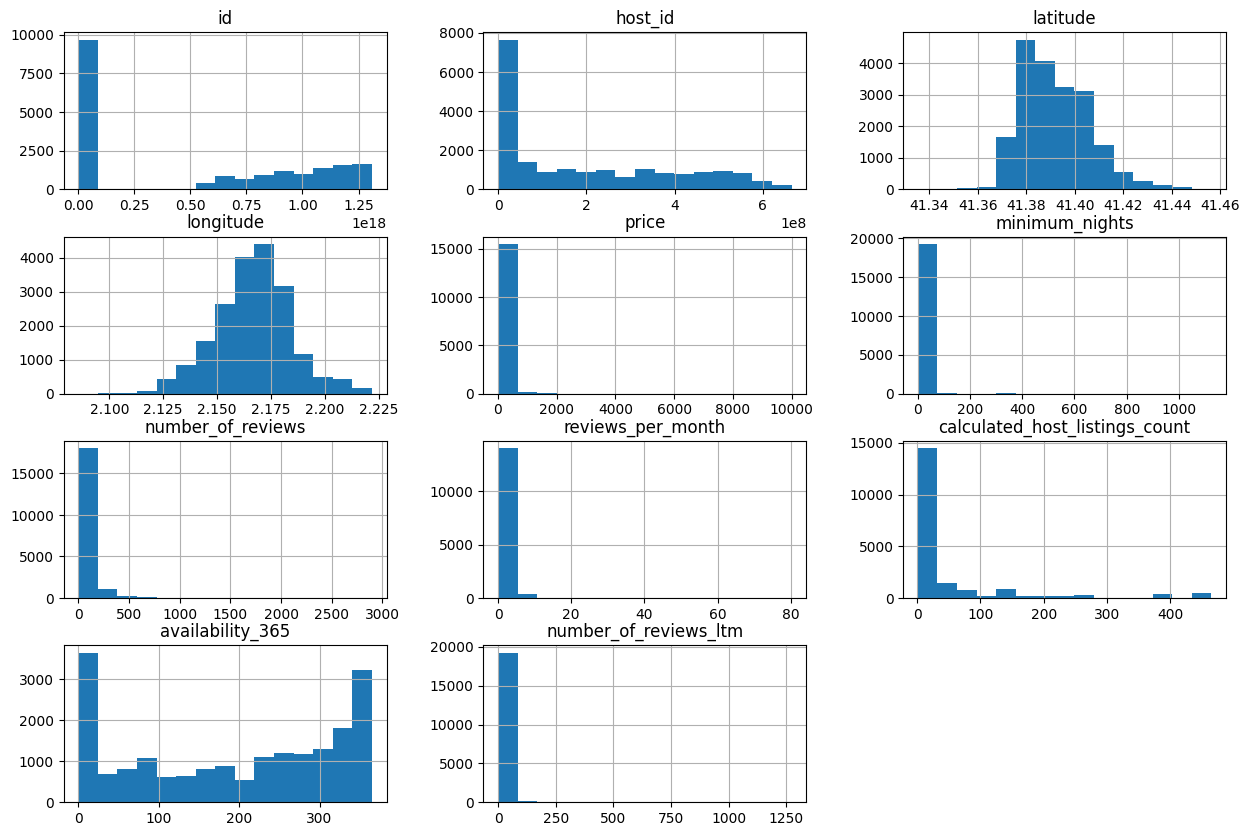

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver a média da coluna `price``
df['price'].mean()

124.20801733477789

### **Q4. Qual a correlação existente entre as variáveis**

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.084416,-0.001617,-0.036422,0.035677,0.062335
minimum_nights,-0.084416,1.000000,-0.151586,-0.201396,0.086240,-0.003972
number_of_reviews,-0.001617,-0.151586,1.000000,0.613744,-0.138762,0.081138
reviews_per_month,-0.036422,-0.201396,0.613744,1.000000,-0.103365,0.082689
calculated_host_listings_count,0.035677,0.086240,-0.138762,-0.103365,1.000000,0.163798
availability_365,0.062335,-0.003972,0.081138,0.082689,0.163798,1.000000


                                      id   host_id  latitude  longitude  \
id                              1.000000  0.455651 -0.019225  -0.023498   
host_id                         0.455651  1.000000 -0.013274  -0.010665   
latitude                       -0.019225 -0.013274  1.000000   0.265987   
longitude                      -0.023498 -0.010665  0.265987   1.000000   
price                          -0.010359 -0.053423 -0.013840  -0.014979   
minimum_nights                  0.054146  0.020732  0.021509  -0.035698   
number_of_reviews              -0.342668 -0.211895 -0.010473   0.005311   
reviews_per_month               0.159272  0.149083 -0.016696   0.006997   
calculated_host_listings_count  0.180328  0.072632 -0.045312  -0.093365   
availability_365                0.101935  0.021776 -0.004679  -0.003134   
number_of_reviews_ltm          -0.135151 -0.046522 -0.014298   0.009801   

                                   price  minimum_nights  number_of_reviews  \
id                  

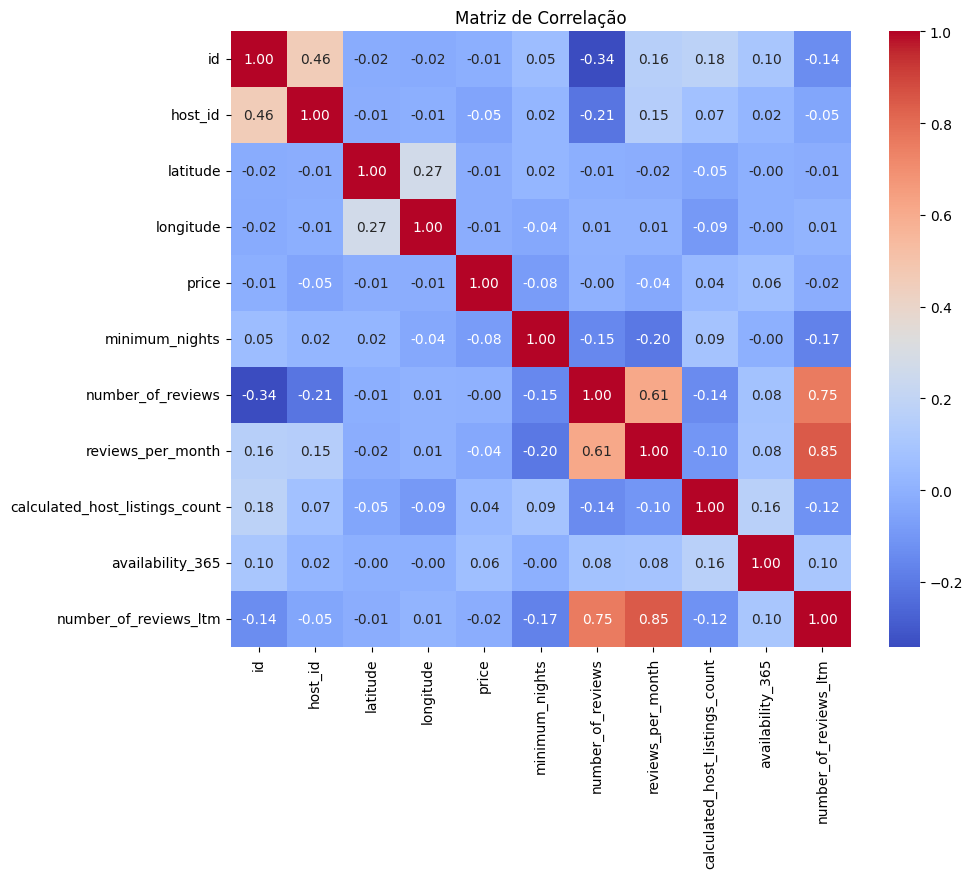

In [28]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação
df.dtypes
colunas_para_remover = df.select_dtypes(include=['object']).columns
df_numerico = df.drop(columns=colunas_para_remover)

matriz_correlacao = df_numerico.corr()
print(matriz_correlacao)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

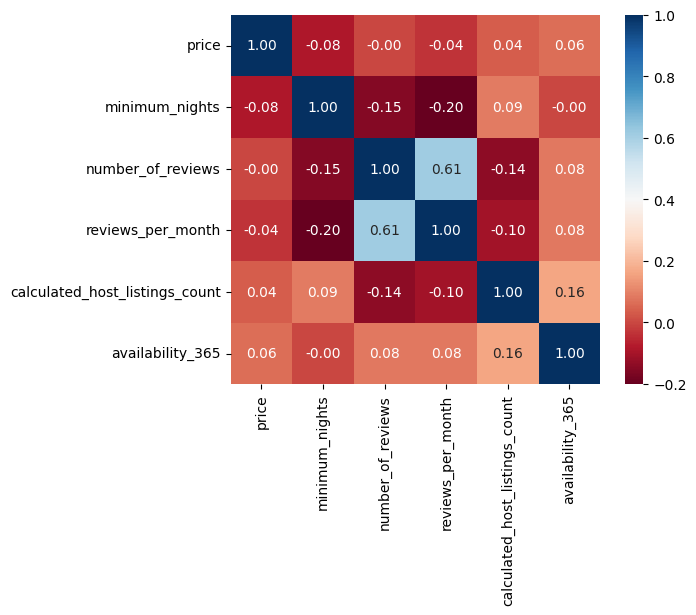

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,11653
Private room,7510
Shared room,177
Hotel room,115


In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.598972
Private room,0.386019
Shared room,0.009098
Hotel room,0.005911


### **Q6. Qual a localidade mais cara do dataset?**



In [32]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Sants - Badal,278.057471
Diagonal Mar i el Front Marítim del Poblenou,232.804054
les Corts,202.179372
la Dreta de l'Eixample,169.287328
la Vila Olímpica del Poblenou,167.816667
la Font d'en Fargues,165.000000
Torre Baró,161.000000
el Parc i la Llacuna del Poblenou,152.674699
el Clot,141.625000


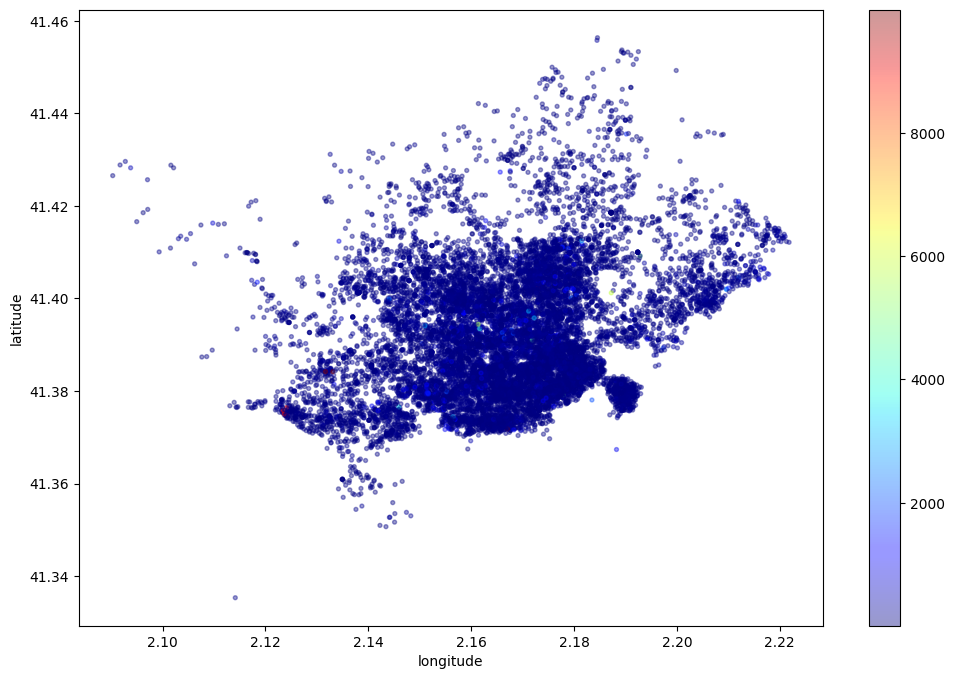

In [34]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [38]:
# ver a média da coluna `minimum_nights``
if 'minimum_nights' in df_clean.columns:
    media_minimum_nights = df_clean['minimum_nights'].mean()
    print(f'A média da coluna minimum_nights é: {media_minimum_nights:.2f}')
else:
    print("A coluna 'minimum_nights' não existe no DataFrame.")

A média da coluna minimum_nights é: 15.51


## Conclusões
